<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib===3.7.1 seaborn==0.13.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [2]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


# To oversample and undersample data
from imblearn.over_sampling import SMOTE

#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [4]:
# loading the dataset
data = pd.read_csv("/content/Churn.csv")

In [5]:
df = data.copy()

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Overview

- Observations
  - Total ~10k records and 14 columns
  - Several object types need proper conversion
  - `Customer_Age` ranges from 18-92
  - Target variable is `Exited`

- Sanity checks
  - `RowNumber`, `CustomerId` unique field has to be dropped
  - `Surname` doesnt possess any value has to be dropped as well
  - `Age` can be grouped into bins
  -  No null values across all the columns
  -  No duplicates
  - `Geography` has 3 values, it can be one hot encoded
  - `Gender` has 2 values, it can also be one hot encoded

In [7]:
df.shape

(10000, 14)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

In [11]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


In [12]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [13]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [14]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [15]:
df['Age'].nunique()

70

In [16]:
# Print all unique customer ages
s = df['Age'].unique()
s.sort()
print(s)

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 88 92]


In [17]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [18]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [19]:
# Remove unwanted columns in model building as its unique id and doesnt add much value
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

## Exploratory Data Analysis

### Summary

**Univariate Analysis**
- Majority of customers are between 30-40 age group
- Low balance is maintained by majority customers
- 50% of customers are from France
- Male customer counts are slightly higher than female counts



**Bi/Multi-variate Analaysis**
- `Age` and `Balance` has positive correlation with `Exited`
- That means the higher the age, they are prone to exit the bank, pbly retirees
- Higher the balance, they are also exiting the bank, this is concerning

- `Balance` and `NumOfProducts` are negative correlated
- That doesnt make sense, as total balance should increase as number of products increase
- `IsActiveMember` and `NumOfProducts` are also negatively correlated with `Exited`
- That means more the products customer has, less the attrition is


**WithRespect to target variable**
- Customer with 1 product are more exited than customers with 2, 3, 4 products
- Germany and France has similar customer attrition, but both Female, Male have more or less similar attrition

#### Segregate numerical and categorical features

In [20]:
# Selecting numerical columns
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
print(len(numeric_features))
print(numeric_features)
# Selecting numerical columns
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()
print(len(categorical_features))
print(categorical_features)

9
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
2
['Geography', 'Gender']


#### Function Definitions - Exploratory Data Analysis

In [21]:
# Function that plots charts given column names and sizes
def plotCharts(columns, fig_width, fig_length, grid_row, grid_col, plot_fn, rotate_ticks=False) :
  plt.figure(figsize=(fig_width, fig_length))
  for i, variable in enumerate(columns):
    plt.subplot(grid_row, grid_col, i + 1)
    plot_fn(variable)
    if rotate_ticks:
      plt.xticks(rotation=90)
    plt.tight_layout()
  plt.show()

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=8)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=8,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [23]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    #print(tab1)
    #print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [24]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

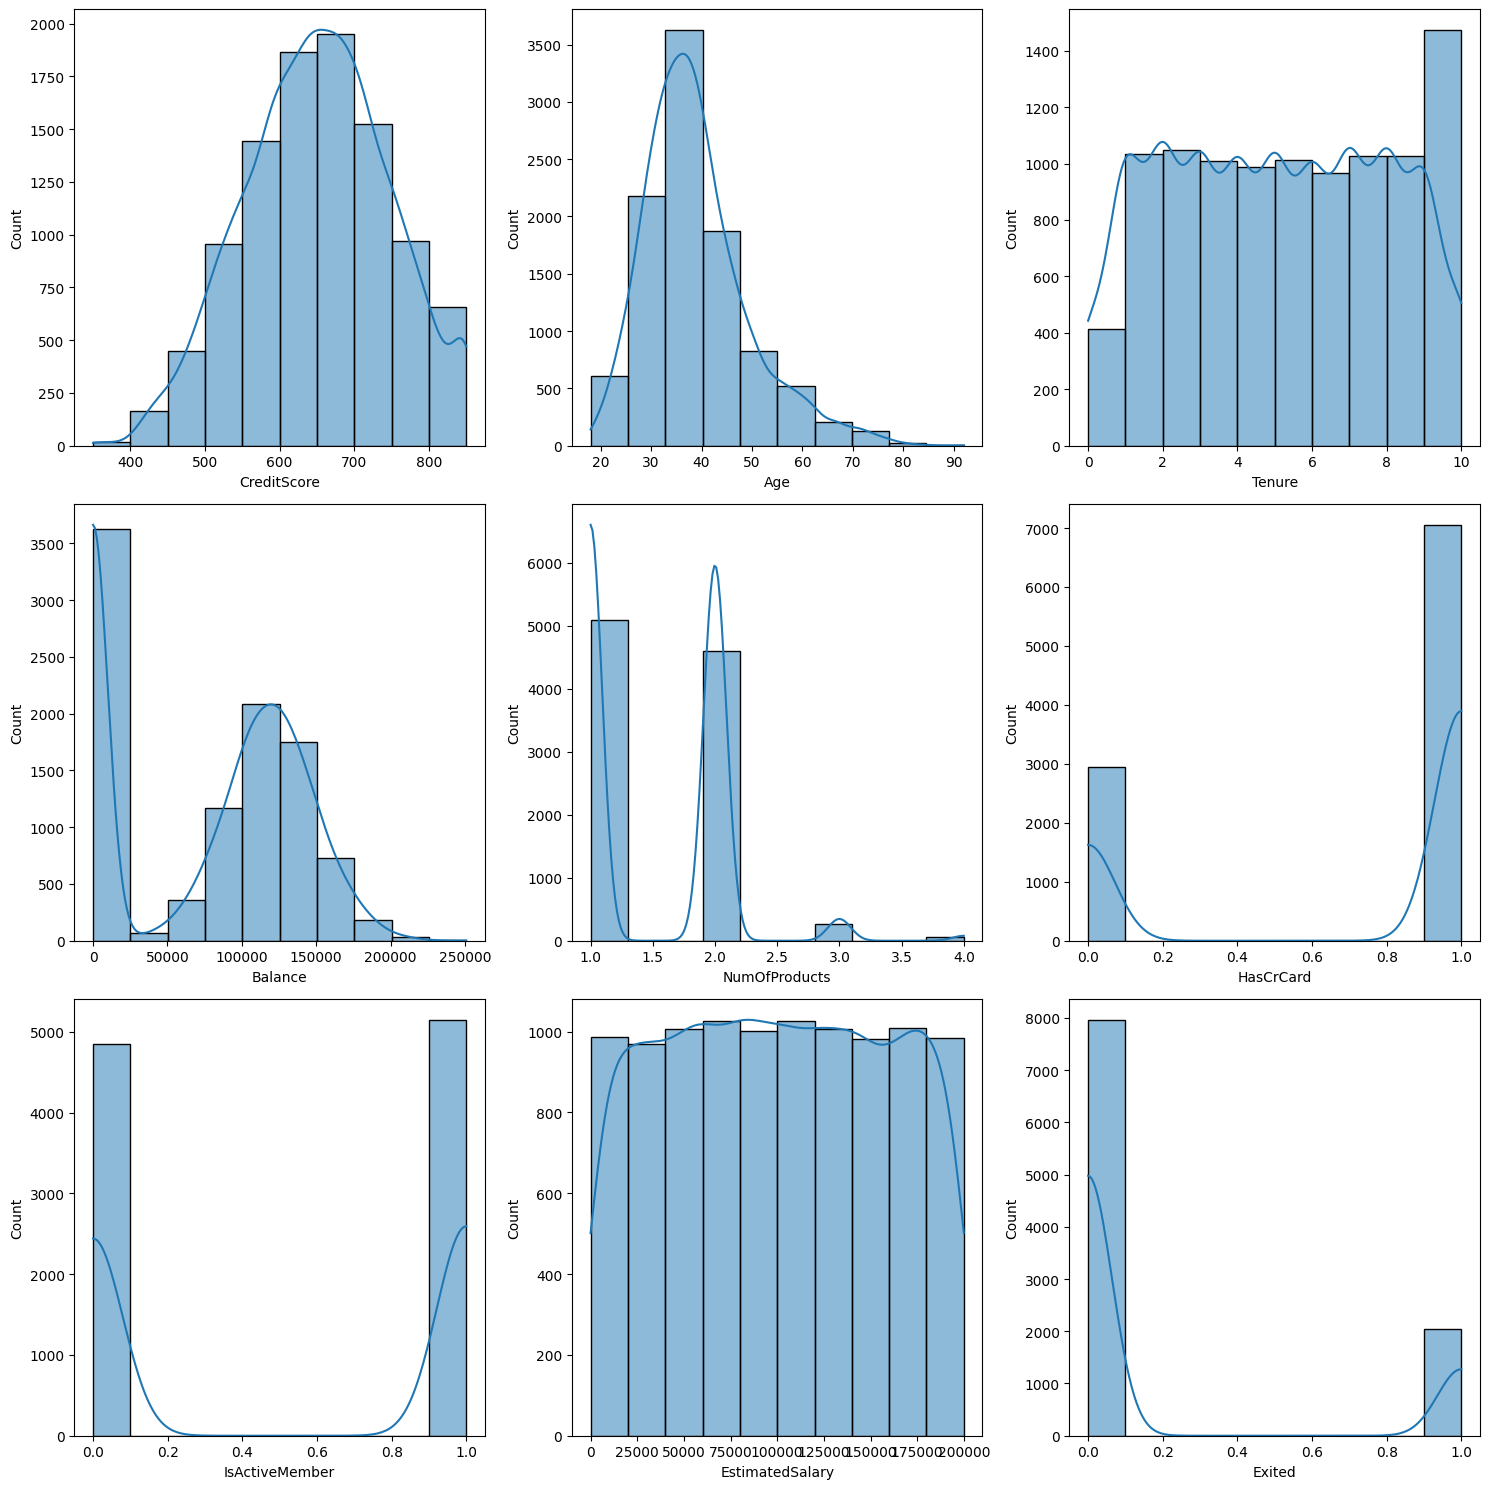

In [25]:
# Plotting histogram with kde on all numeric columns that are meaningful
# This will provide insights on the distribution of the numerical data
plotCharts(numeric_features, 15, 15, 3, 3, lambda variable: sns.histplot(data=df, bins=10, x=variable, kde=True))

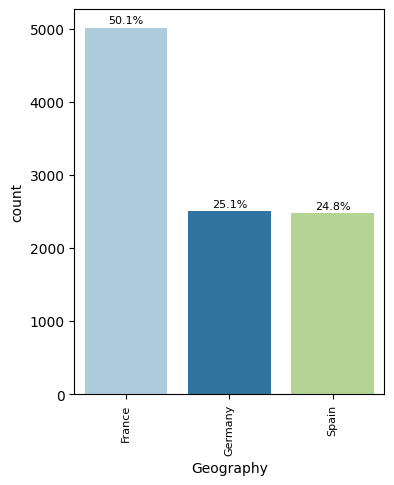

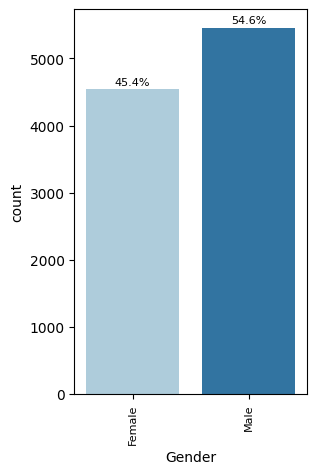

In [26]:
# For all categorical features get the count charted
for feature in categorical_features:
    labeled_barplot(data, feature, perc=True)

### Bivariate Analysis

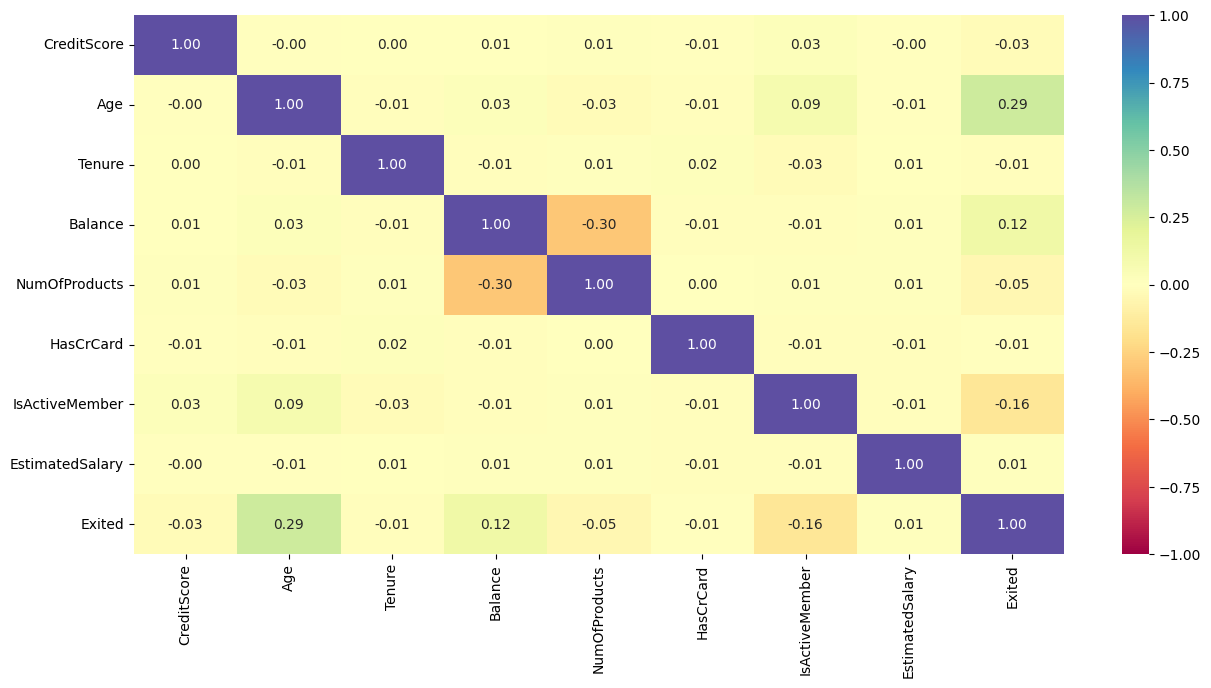

In [27]:
# Use only numerical features for correlation
plt.figure(figsize=(15, 7))
sns.heatmap(df[numeric_features].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

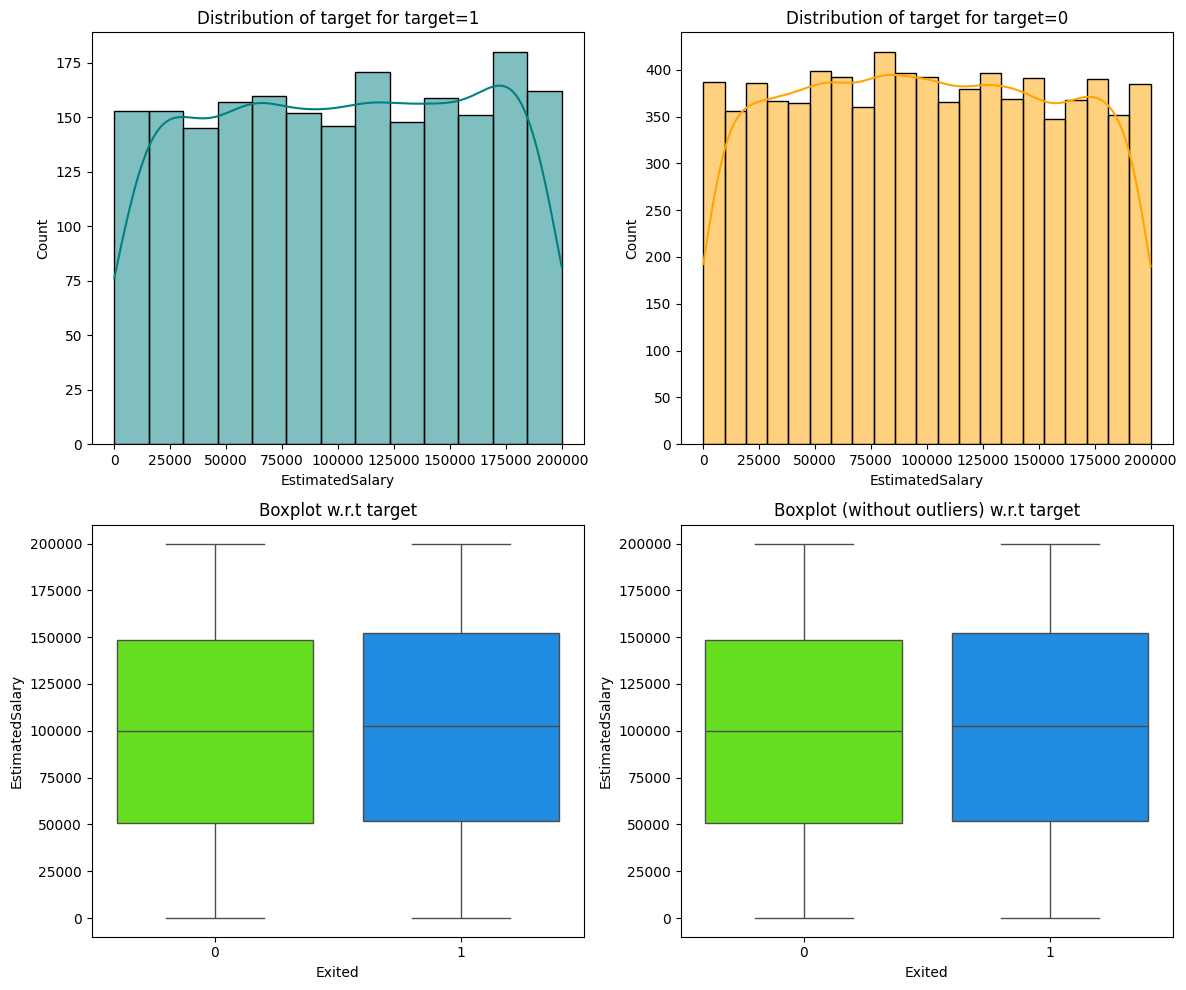

In [28]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Exited")

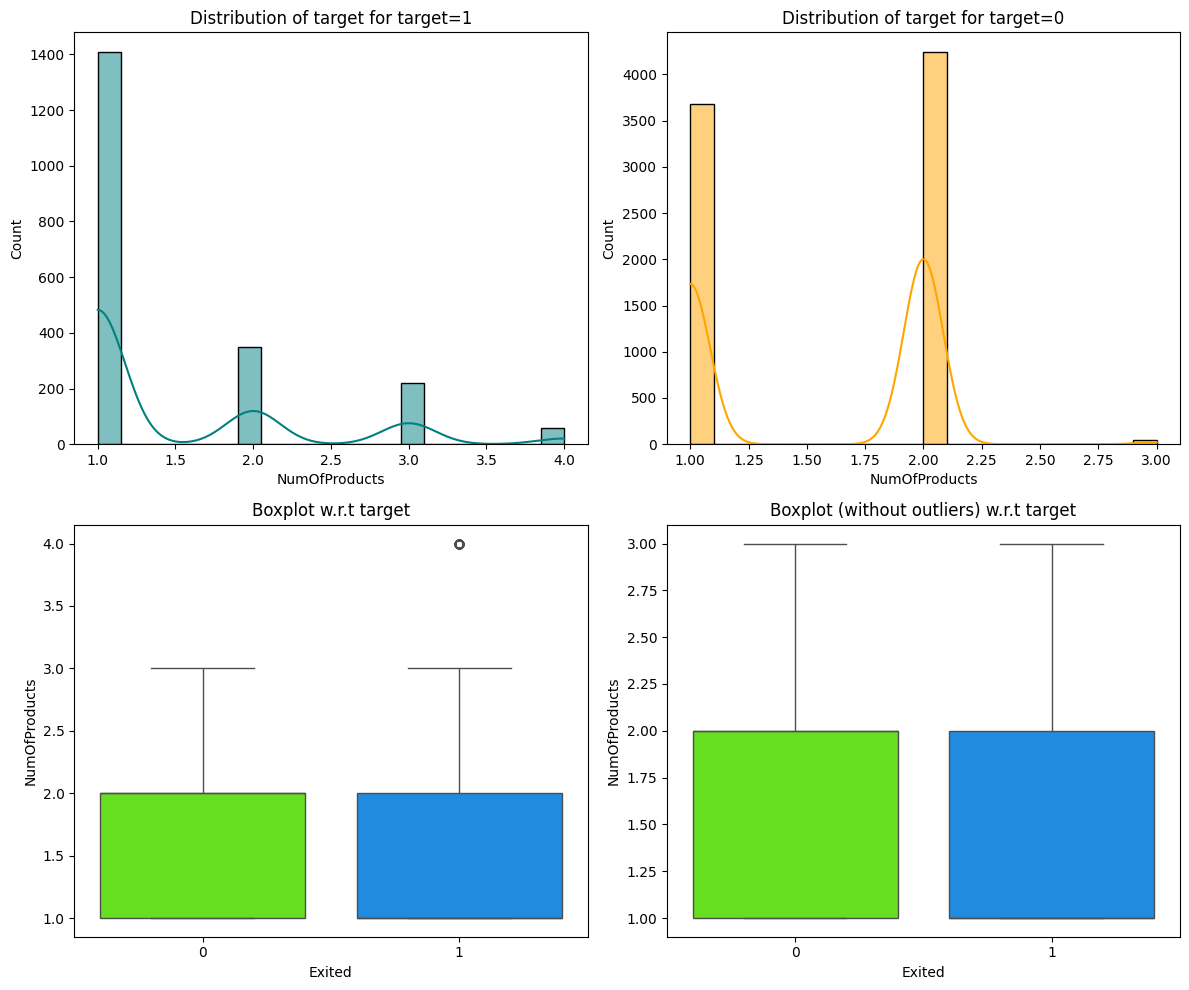

In [29]:
distribution_plot_wrt_target(data, "NumOfProducts", "Exited")

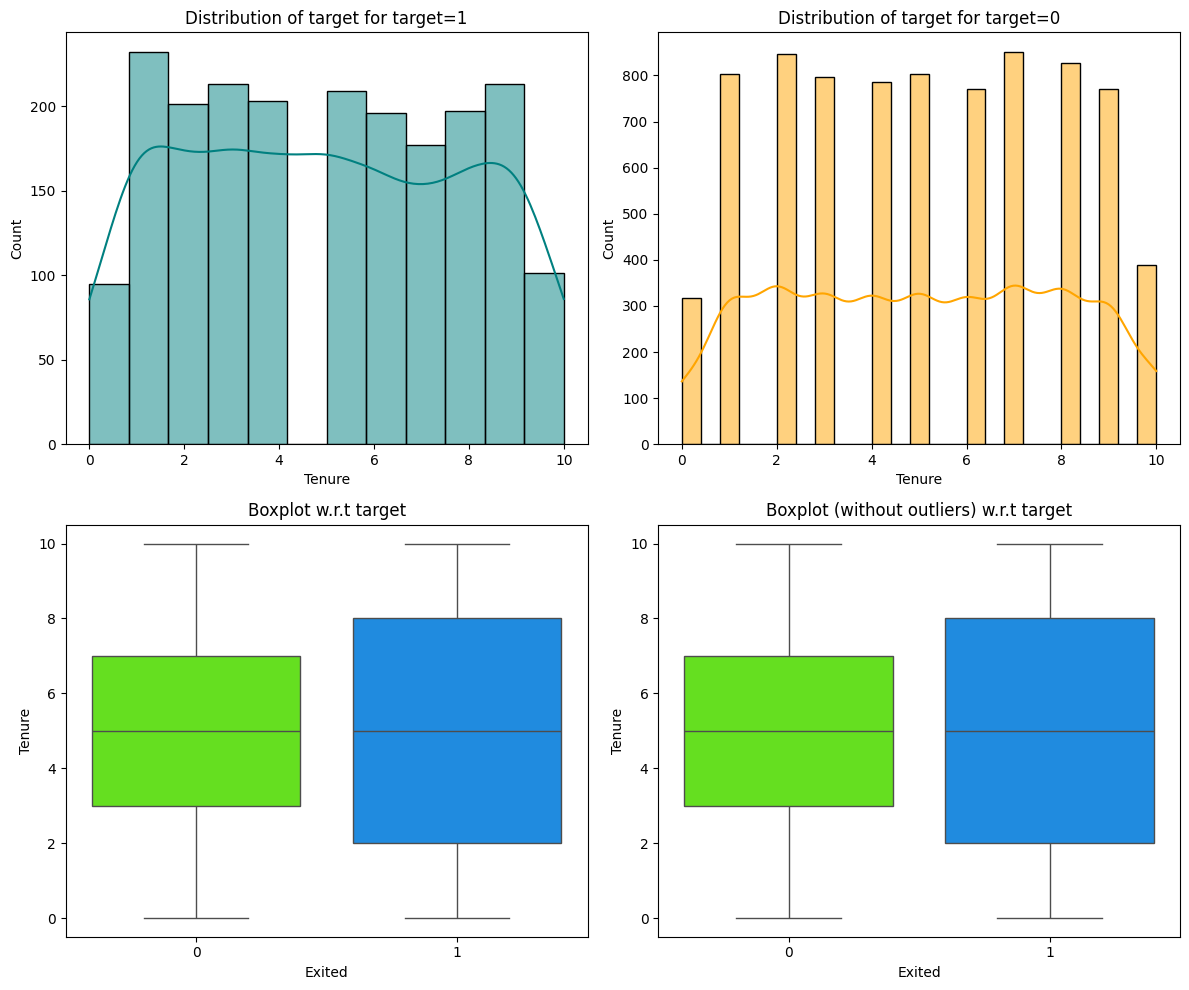

In [30]:
distribution_plot_wrt_target(data, "Tenure", "Exited")

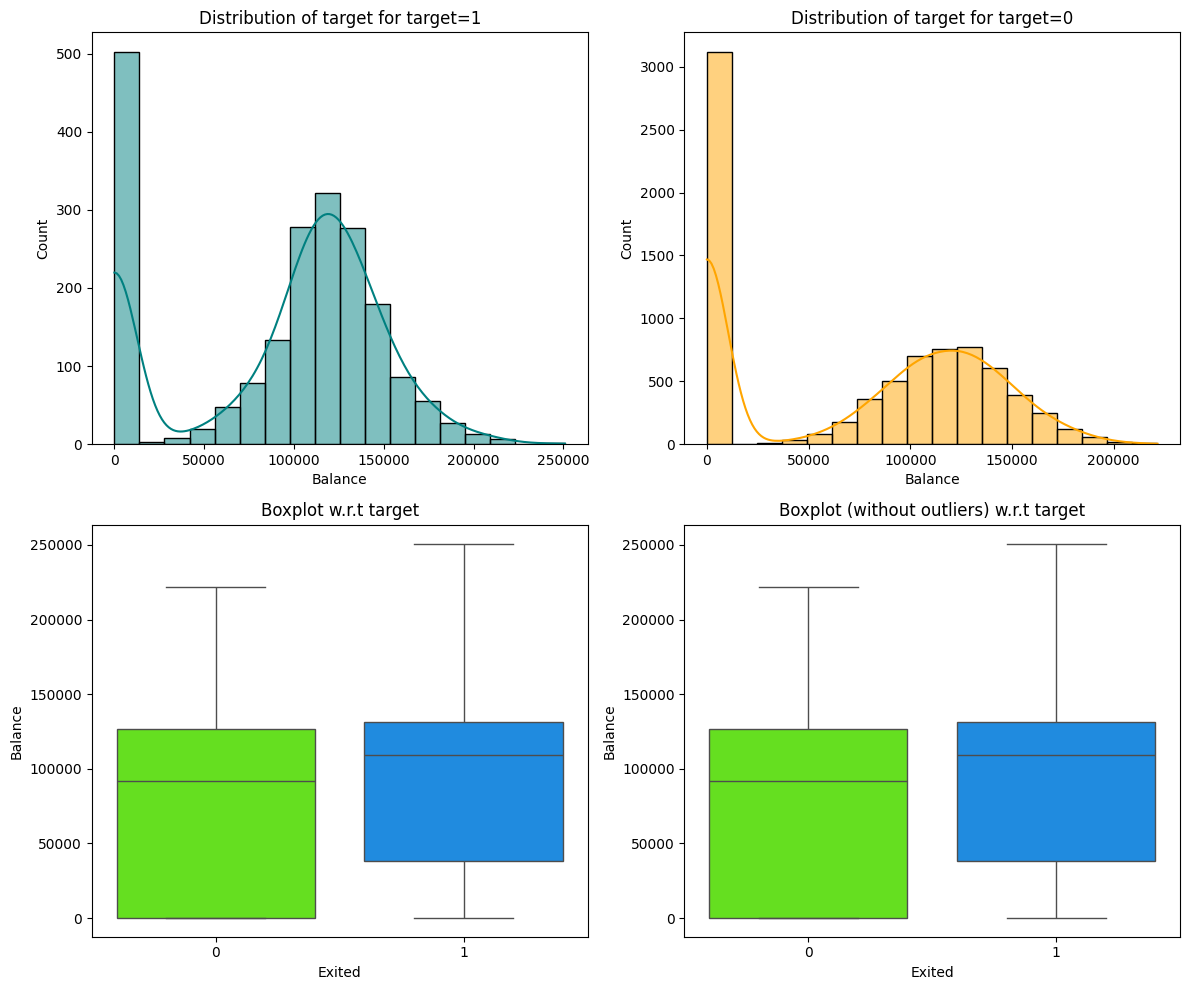

In [31]:
distribution_plot_wrt_target(data, "Balance", "Exited")

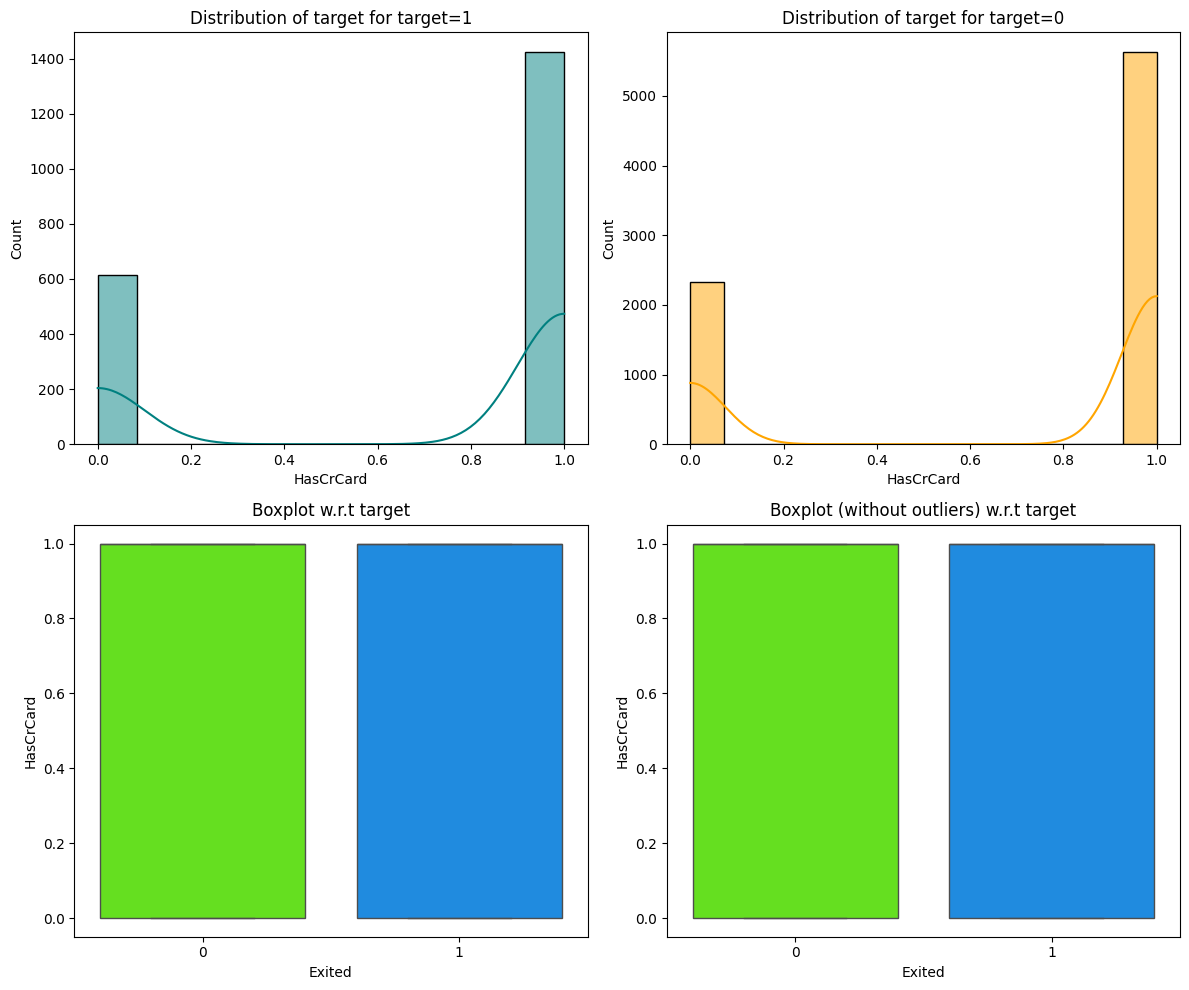

In [32]:
distribution_plot_wrt_target(data, "HasCrCard", "Exited")

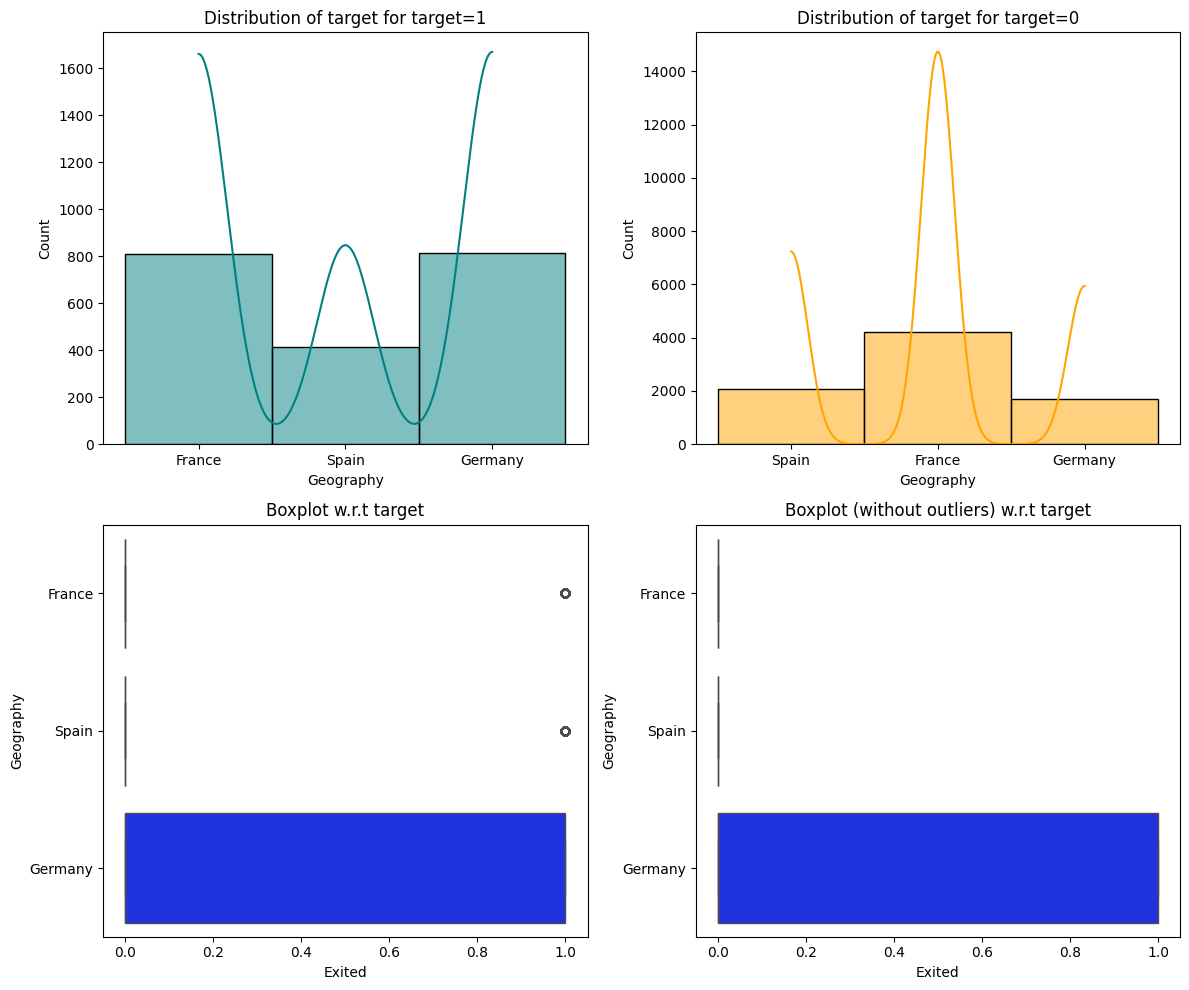

In [33]:
distribution_plot_wrt_target(data, "Geography", "Exited")

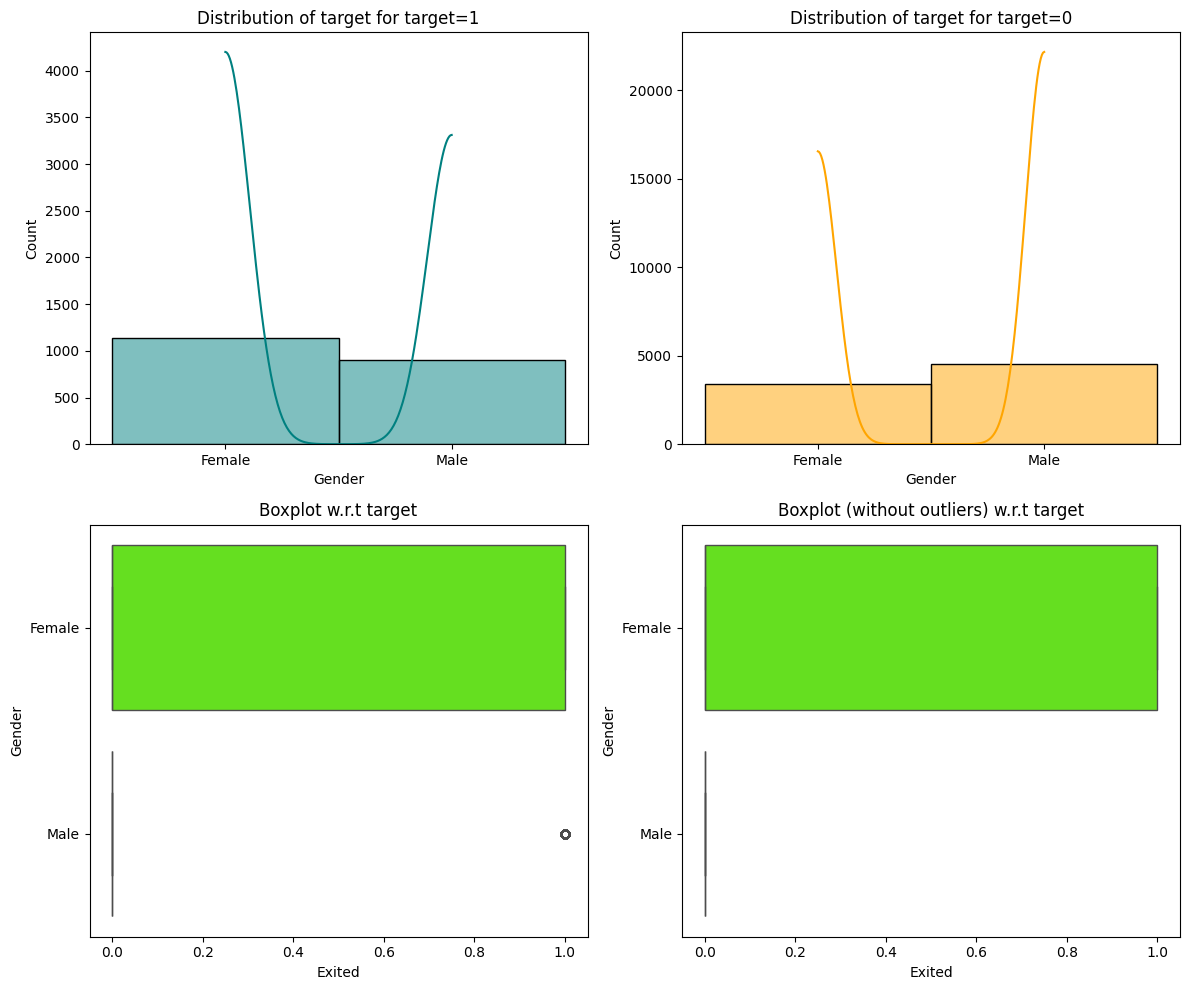

In [34]:
distribution_plot_wrt_target(data, "Gender", "Exited")

## Data Preprocessing

### Summary

- `Gender` and `Geography` are recategorized with numerical encoding
- `Age` since there are 70 unique values are grouped under `Age_Group` with 9 bins
- Selective categorical columns are `one hot encoded` and number of columns increased to 20
- Data is split into train, validatin and test datasets

### Dummy Variable Creation

In [35]:
# Encode all categorical columns with numeric

gender = {
"Male": 0,
"Female": 1
}
df["Gender"] = df["Gender"].map(gender)

geography = {
"Germany": 0,
"France": 1,
"Spain": 2
}
df["Geography"] = df["Geography"].map(geography)

# Define age bins and labels
bins = [10, 19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Create the Age_Group column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group = {
"10-19": 0,
"20-29": 1,
"30-39": 2,
"40-49": 3,
"50-59": 4,
"60-69": 5,
"70-79": 6,
"80-89": 7,
"90-99": 8,
}
df["Age_Group"] = df["Age_Group"].map(age_group)

In [36]:
df['Geography'] = df['Geography'].astype('category')
df['Age_Group'] = df['Age_Group'].astype('category')
df['NumOfProducts'] = df['NumOfProducts'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [37]:
# Remove Age as its unique id and doesnt add much value
df.drop(["Age"], axis=1, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Tenure           10000 non-null  int64   
 4   Balance          10000 non-null  float64 
 5   NumOfProducts    10000 non-null  category
 6   HasCrCard        10000 non-null  int64   
 7   IsActiveMember   10000 non-null  int64   
 8   EstimatedSalary  10000 non-null  float64 
 9   Exited           10000 non-null  int64   
 10  Age_Group        10000 non-null  category
dtypes: category(4), float64(2), int64(5)
memory usage: 586.9 KB


In [39]:
df.sample(n=10, random_state=1)

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
9953,550,1,0,2,0.00,2,1,1,97057.28,0,3
3850,680,1,0,3,143292.95,1,1,0,66526.01,0,2
4962,531,1,1,2,0.00,2,0,1,90537.47,0,3
3886,710,0,0,8,147833.30,2,0,1,1561.58,0,2
5437,543,0,0,6,73481.05,1,1,1,176692.65,0,2
8517,688,1,0,8,137624.40,2,1,1,197582.79,0,1
2041,840,1,1,1,94968.97,1,1,0,84487.62,0,3
1989,695,2,0,0,96020.86,1,1,1,57992.49,0,1
1933,666,0,0,7,105102.50,1,1,1,46172.47,0,6
9984,602,0,0,7,90602.42,2,1,1,51695.41,0,2


### Encoding categorical variables

#### Summary
- One hot encode the categorical columns
- Total columns becomes `20` after one hot encoding

In [40]:
## Separating Independent and Dependent Columns
X = df.drop(['Exited'],axis=1)
Y = df['Exited']

print(X.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Age_Group'],
      dtype='object')


In [41]:
# Get list of categorical and numerical columns
cat_cols = list(df.select_dtypes(include='category').columns)
num_cols = list(df.select_dtypes(include=['int', 'float']).columns)
print(cat_cols)
print(num_cols)

['Geography', 'Gender', 'NumOfProducts', 'Age_Group']
['CreditScore', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [42]:
# Do one hot encoding on all the train, validation and test datasets
# Encoding the categorical variables using one-hot encoding
X = pd.get_dummies(
    X,
    columns=cat_cols,
    drop_first=True,
)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Tenure           10000 non-null  int64  
 2   Balance          10000 non-null  float64
 3   HasCrCard        10000 non-null  int64  
 4   IsActiveMember   10000 non-null  int64  
 5   EstimatedSalary  10000 non-null  float64
 6   Geography_1      10000 non-null  bool   
 7   Geography_2      10000 non-null  bool   
 8   Gender_1         10000 non-null  bool   
 9   NumOfProducts_2  10000 non-null  bool   
 10  NumOfProducts_3  10000 non-null  bool   
 11  NumOfProducts_4  10000 non-null  bool   
 12  Age_Group_1      10000 non-null  bool   
 13  Age_Group_2      10000 non-null  bool   
 14  Age_Group_3      10000 non-null  bool   
 15  Age_Group_4      10000 non-null  bool   
 16  Age_Group_5      10000 non-null  bool   
 17  Age_Group_6  

### Data Normalization

In [44]:
# Check for missing values
X.isnull().sum()

,0
CreditScore,0
Tenure,0
Balance,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Geography_1,0
Geography_2,0
Gender_1,0
NumOfProducts_2,0


### Train-validation-test Split

#### Summary
- Split data into train, val and test datasets
- Number of rows each are 6000, 2000, 2000 respectively



In [45]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(6400, 20) (6400,)
(1600, 20) (1600,)
(2000, 20) (2000,)


In [46]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_valid.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6400
Number of rows in validation data = 1600
Number of rows in test data = 2000


In [47]:
# Print unique values in target variable
print(np.unique(y_train))
print(np.unique(y_valid))
print(np.unique(y_test))

[0 1]
[0 1]
[0 1]


## Model Building

### Utility Functions

In [48]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [49]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

Model can make following wrong predictions
- `False Positives` - Predicting customer is not going to exit, when he/she is going to.
- `False Negatives` - Predicting customer is going to exit, when he/she is not going to.

`F1 score` provides a balanced measure of precision and recall. In this case it helps address bothe false positives and false negatives, which are equally important in churn prediction.

In [50]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

In [51]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

### Neural Network with SGD Optimizer

In [52]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             294 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()
print("Time taken in seconds ",end-start)

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 65665.8438 - val_loss: 0.6215
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6125 - val_loss: 0.5801
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5771 - val_loss: 0.5543
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5552 - val_loss: 0.5379
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5415 - val_loss: 0.5273
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5327 - val_loss: 0.5204
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5270 - val_loss: 0.5157
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5233 - val_loss: 0.5126
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5209 - val_loss: 0.5105
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5193 - val_loss: 0.5090
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5183 - val_loss: 0.5080
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

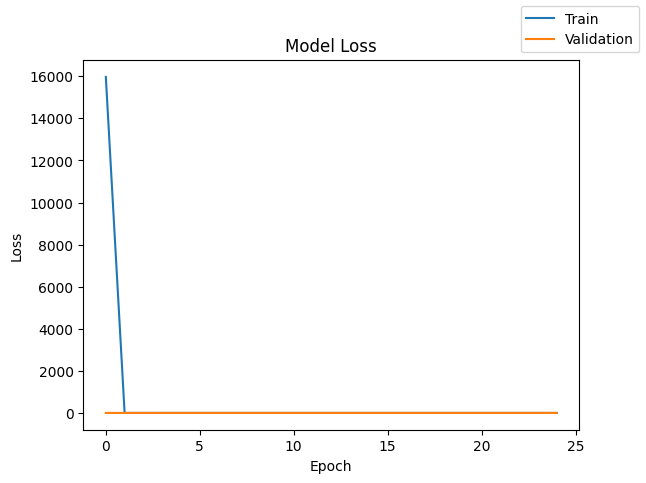

In [54]:
plot(history,'loss')

In [55]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.79625,0.79625,0.634014,0.705931


In [56]:
model_0_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_0_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.79625,0.79625,0.634014,0.705931


## Model Performance Improvement

### Neural Network with Adam Optimizer

In [57]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             294 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()
print("Time taken in seconds ",end-start)

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 20056.2871 - val_loss: 1604.2142
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 930.8087 - val_loss: 119.9878
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.8559 - val_loss: 92.6870
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62.6402 - val_loss: 88.7383
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.7291 - val_loss: 102.9016
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.2339 - val_loss: 67.3097
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63.2954 - val_loss: 52.5799
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.5273 - val_loss: 80.8148
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.7992 - val_loss: 24.1835
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.5301 - val_loss: 56.2451
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.5621 - val_loss: 63.6831
Epoch 12/25
100/100 ━━

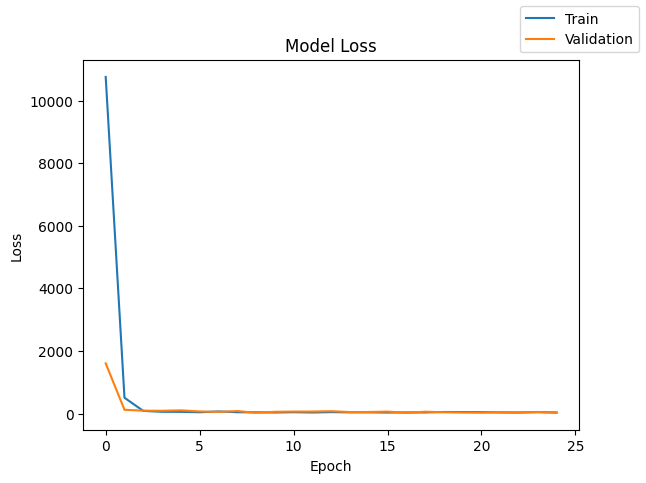

In [59]:
plot(history,'loss')

In [60]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.791562,0.791562,0.719264,0.719447


In [61]:
model_1_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_1_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.78875,0.78875,0.696604,0.71192


### Neural Network with Adam Optimizer and Dropout

In [62]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
model.summary()
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             294 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()
print("Time taken in seconds ",end-start)

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5965.0186 - val_loss: 501.6901
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2057.3149 - val_loss: 243.9827
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 914.3717 - val_loss: 65.2068
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 286.4541 - val_loss: 20.1831
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 156.4171 - val_loss: 10.9076
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.4111 - val_loss: 3.5477
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.3976 - val_loss: 1.3364
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2150 - val_loss: 0.6789
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3526 - val_loss: 0.5687
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1921 - val_loss: 0.5580
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8996 - val_loss: 0.5491
Epoch 12/25
100/100 ━━━━━━━━━━━

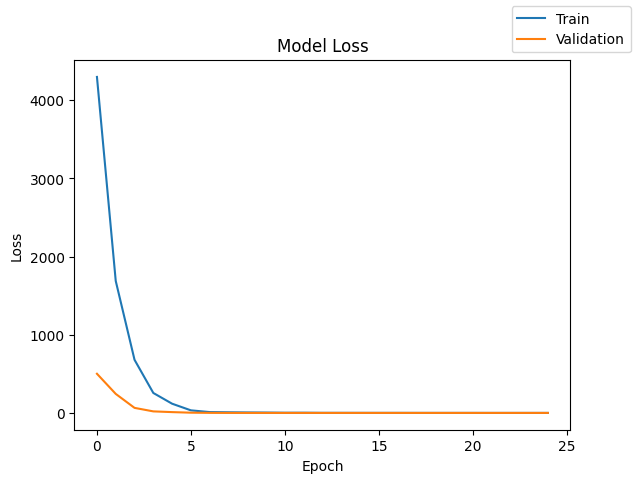

In [64]:
plot(history,'loss')

In [65]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.796406,0.796406,0.837863,0.706304


In [66]:
model_2_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_2_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.79625,0.79625,0.634014,0.705931


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [67]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [68]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1304
Before Oversampling, counts of label 'No': 5096 

After Oversampling, counts of label 'Yes': 5096
After Oversampling, counts of label 'No': 5096 

After Oversampling, the shape of train_X: (10192, 20)
After Oversampling, the shape of train_y: (10192,) 



In [69]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             294 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end = time.time()
print("Time taken in seconds ",end-start)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 379.2803 - val_loss: 1.0328
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6065 - val_loss: 1.1901
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5616 - val_loss: 1.2578
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5532 - val_loss: 1.2875
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5512 - val_loss: 1.3007
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5507 - val_loss: 1.3066
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5505 - val_loss: 1.3092
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5504 - val_loss: 1.3104
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5503 - val_loss: 1.3110
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5503 - val_loss: 1.3112
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5503 - val_loss: 1.3113
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

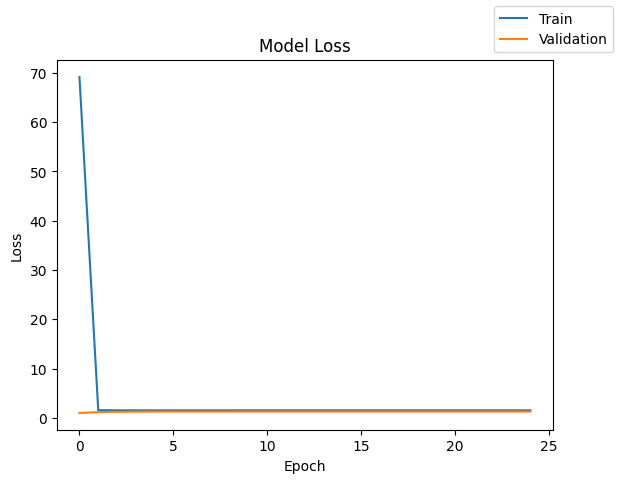

In [71]:
plot(history,'loss')

In [72]:
model_3_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_3_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.5,0.5,0.25,0.333333


In [73]:
model_3_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_3_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.20375,0.20375,0.041514,0.068975


### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [74]:
# Synthetic Minority Over Sampling Technique is already done above so skipping
# sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
# X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [75]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1304
Before Oversampling, counts of label 'No': 5096 

After Oversampling, counts of label 'Yes': 5096
After Oversampling, counts of label 'No': 5096 

After Oversampling, the shape of train_X: (10192, 20)
After Oversampling, the shape of train_y: (10192,) 



In [76]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             294 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end = time.time()
print("Time taken in seconds ",end-start)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 4434.5854 - val_loss: 83.5634
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.3851 - val_loss: 16.3600
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.2438 - val_loss: 6.5403
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.1745 - val_loss: 6.7311
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.1383 - val_loss: 20.8501
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.2071 - val_loss: 4.7496
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8835 - val_loss: 7.2793
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5491 - val_loss: 3.4609
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7783 - val_loss: 1.4677
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1267 - val_loss: 11.7664
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0696 - val_loss: 7.0182
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 

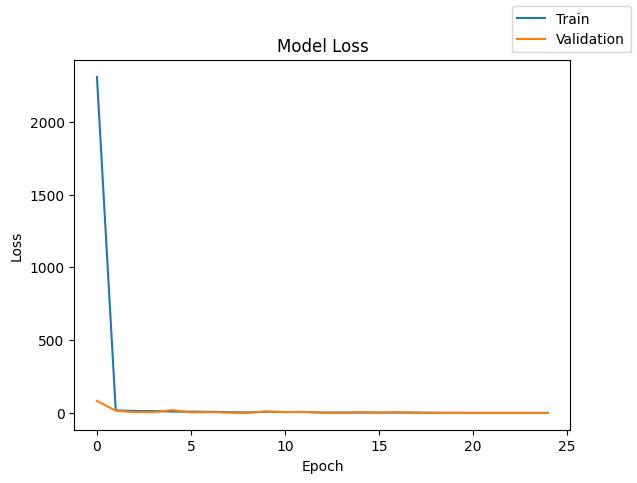

In [78]:
plot(history,'loss')

In [79]:
model_4_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_4_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.5,0.5,0.25,0.333333


In [80]:
model_4_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_4_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.20375,0.20375,0.041514,0.068975


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [81]:
# Synthetic Minority Over Sampling Technique is already done above so skipping
# sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
# X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [82]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1304
Before Oversampling, counts of label 'No': 5096 

After Oversampling, counts of label 'Yes': 5096
After Oversampling, counts of label 'No': 5096 

After Oversampling, the shape of train_X: (10192, 20)
After Oversampling, the shape of train_y: (10192,) 



In [83]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
model.summary()
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             294 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_valid, y_valid) , batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end = time.time()
print("Time taken in seconds ",end-start)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 13111.2021 - val_loss: 1889.5223
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2467.7175 - val_loss: 156.7598
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 801.2530 - val_loss: 0.9350
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 357.0558 - val_loss: 0.8776
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 183.5677 - val_loss: 1.0127
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 136.2205 - val_loss: 1.1677
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111.6979 - val_loss: 1.1120
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 58.6961 - val_loss: 1.3529
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.0840 - val_loss: 1.2855
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.5014 - val_loss: 1.0018
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 36.6795 - val_loss: 1.3116
Epoch 12/25
160/160 ━━━━━

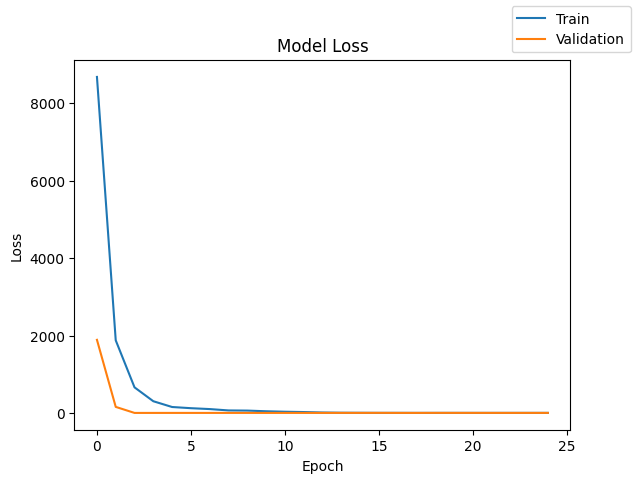

In [85]:
plot(history,'loss')

In [86]:
model_5_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_5_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.500294,0.500294,0.750074,0.333987


In [87]:
model_5_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_5_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.20375,0.20375,0.041514,0.068975


### Neural Network with Adam Optimizer, He initialization and Dropout

In [88]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [89]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))
model.summary()
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             294 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid),
                    batch_size=batch_size, epochs=epochs)
end=time.time()
print("Time taken in seconds ",end-start)

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8824.2852 - val_loss: 442.6974
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1539.0226 - val_loss: 413.7126
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 784.8466 - val_loss: 298.7733
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 439.2862 - val_loss: 168.7809
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 242.1122 - val_loss: 81.5042
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 145.4424 - val_loss: 14.6236
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 115.4555 - val_loss: 0.5883
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75.6425 - val_loss: 0.5781
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.1104 - val_loss: 0.5684
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.7748 - val_loss: 0.5594
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.6810 - val_loss: 0.5515
Epoch 12/25
100/100 ━━

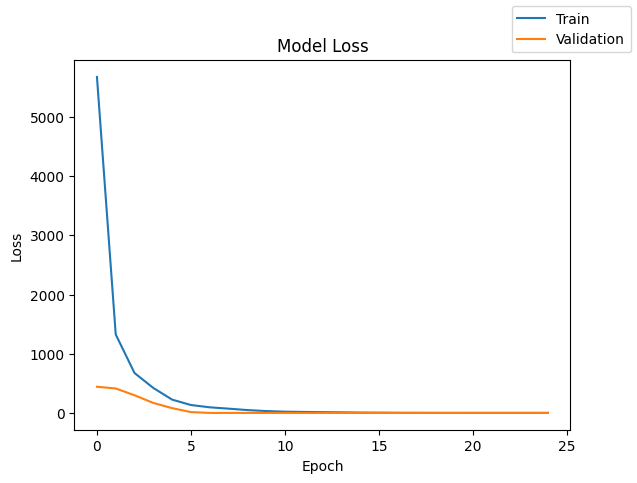

In [91]:
plot(history,'loss')

In [92]:
model_6_train_perf = model_performance_classification(model, X_train, y_train)
model_6_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.79625,0.79625,0.634014,0.705931


In [93]:
model_6_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_6_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.79625,0.79625,0.634014,0.705931


## Model Performance Comparison and Final Model Selection

In [94]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, Dropout [0.4,0.2])",
    "Neural Network (SGD, No Regularization) - SMOTE Data",
    "Neural Network (Adam, No Regularization) - SMOTE Data",
    "Neural Network (Adam, Dropout [0.4,0.2]) - SMOTE Data",
    "Neural Network (Adam, He, Dropout [0.4,0.2])"
]

In [95]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T,
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, Dropout [0.4,0.2])",
    "Neural Network (SGD, No Regularization) - SMOTE Data",
    "Neural Network (Adam, No Regularization) - SMOTE Data",
    "Neural Network (Adam, Dropout [0.4,0.2]) - SMOTE Data",
    "Neural Network (Adam, He, Dropout [0.4,0.2])"
]

In [96]:
models_train_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, Dropout [0.4,0.2])","Neural Network (SGD, No Regularization) - SMOTE Data","Neural Network (Adam, No Regularization) - SMOTE Data","Neural Network (Adam, Dropout [0.4,0.2]) - SMOTE Data","Neural Network (Adam, He, Dropout [0.4,0.2])"
Accuracy,0.796250,0.791562,0.796406,0.500000,0.500000,0.500294,0.796250
Recall,0.796250,0.791562,0.796406,0.500000,0.500000,0.500294,0.796250
Precision,0.634014,0.719264,0.837863,0.250000,0.250000,0.750074,0.634014
F1 Score,0.705931,0.719447,0.706304,0.333333,0.333333,0.333987,0.705931


In [97]:
models_valid_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, Dropout [0.4,0.2])","Neural Network (SGD, No Regularization) - SMOTE Data","Neural Network (Adam, No Regularization) - SMOTE Data","Neural Network (Adam, Dropout [0.4,0.2]) - SMOTE Data","Neural Network (Adam, He, Dropout [0.4,0.2])"
Accuracy,0.796250,0.788750,0.796250,0.203750,0.203750,0.203750,0.796250
Recall,0.796250,0.788750,0.796250,0.203750,0.203750,0.203750,0.796250
Precision,0.634014,0.696604,0.634014,0.041514,0.041514,0.041514,0.634014
F1 Score,0.705931,0.711920,0.705931,0.068975,0.068975,0.068975,0.705931


In [98]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

,F1 Score
"Neural Network (SGD, No Regularization)",0.000000
"Neural Network (Adam , No Regularization)",0.007527
"Neural Network (Adam, Dropout [0.4,0.2])",0.000374
"Neural Network (SGD, No Regularization) - SMOTE Data",0.264359
"Neural Network (Adam, No Regularization) - SMOTE Data",0.264359
"Neural Network (Adam, Dropout [0.4,0.2]) - SMOTE Data",0.265013
"Neural Network (Adam, He, Dropout [0.4,0.2])",0.000000


#### Final Model Report

**Final Model**
- Overall Adam + He Normal + Dropout (`Neural Network (Adam, He, Dropout [0.4,0.2])`) stood out in the loss curve
- Both train and validation set converges around same epoch
- Also it has a good overall `F1 score` of `0.70`
- Runtime of this is around `~11 seconds` which is comparitively good

**Test Data Scores**
- `Weighted F1 score` for this final model is `0.71` with test data
- Its a good F1 score and brings good balance between precision and recall and good in classifying with minimal false positives and false negatives


In [99]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [100]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))
model.summary()
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             294 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
from sklearn.utils import class_weight

start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid),
                    batch_size=batch_size, epochs=epochs)
end=time.time()
print("Time taken in seconds ",end-start)

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 57012.1445 - val_loss: 688.8678
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17951.5820 - val_loss: 2132.1956
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9981.1357 - val_loss: 1348.3855
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5385.3188 - val_loss: 409.2114
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3165.4062 - val_loss: 28.0313
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2409.8301 - val_loss: 2.6527
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1554.4297 - val_loss: 0.5914
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1466.4183 - val_loss: 0.5794
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1172.7687 - val_loss: 0.5678
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 926.1767 - val_loss: 0.5579
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 713.9474 - val_loss: 0.5485
Epoch 12

In [102]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [103]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5096
           1       0.00      0.00      0.00      1304

    accuracy                           0.80      6400
   macro avg       0.40      0.50      0.44      6400
weighted avg       0.63      0.80      0.71      6400



In [104]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1274
           1       0.00      0.00      0.00       326

    accuracy                           0.80      1600
   macro avg       0.40      0.50      0.44      1600
weighted avg       0.63      0.80      0.71      1600



In [105]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



## Actionable Insights and Business Recommendations

#### Actionable Insights

- Marketing Campaigns
  - Customers who have 1 product tend to exit more, so increase promotional offers on other products
  

 - Regional Campaigns
  - Expand marketing and promotions on customer retention in Germany & France as they have more attrition

- Targetted Surveys & Campaigns
  - Recurrent churn reporting to management of customer using above Neural Network Model
  - Use targetted surveys for those potential would be exitting customers to understand their need constantly and bring in changes to the products based on that
  - Use targetted marketting campaigns to same would be exitting customers and make them retain

- Customer Activeness
  - Run weekly reports to find inactive customers
  - Send them balance report and insights into their account features, mobile app, etc so they login/transact more frequently

#### Business Recommendations


  - Retirees are tend to exit more, bring in more products around that like pension plan, etc
  - Low balance is maintained on all accounts, bring in high yield savings and investment accounts for retaining customers
  - Target age group of 30-40 with more investment strategies, bond laders with significant tax savings for retention
  - Levereage customer activeness indicator to use that alsong with predicted possibility of leaving and send them awareness about all the different features, products to retain